In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('egfr_chembl_w_3d_desc.csv')
df.head(5)

,Molecule ChEMBL ID,Standardized Smiles,pIC50,MolWt,TPSA,nRotB,HBD,HBA,LogP,NumHetAtoms,...,Asphericity,Eccentricity,InertShpFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadGyr,SphIndex
0,CHEMBL271410,Cc1cccc(Nc2ncnc3ccncc23)c1NCCCN1CCOCC1,8.03,378.216809,75.20,8.0,2.0,7.0,3.21102,7.0,...,0.346792,0.949285,0.000302,0.314416,0.709979,2348.473406,5303.056829,7469.314058,4.469424,0.078888
1,CHEMBL411243,CN(C)CCCCCNc1c(Br)cccc1Nc1ncnc2ccncc12,8.07,428.132407,65.97,11.0,2.0,6.0,4.67470,7.0,...,0.515057,0.979596,0.000452,0.200975,0.836380,1849.092420,7695.223512,9200.625574,4.672112,0.082435
2,CHEMBL270713,CN(C)CCNc1c(Br)cccc1Nc1ncnc2ccncc12,7.34,386.085457,65.97,8.0,2.0,6.0,3.50440,7.0,...,0.450754,0.970872,0.000518,0.239600,0.777725,1501.590763,4874.070040,6267.084316,4.040084,0.075970
3,CHEMBL54475,Brc1cccc(Nc2ncnc3ncccc23)c1,6.16,300.001058,50.70,2.0,1.0,4.0,3.53090,5.0,...,0.671818,0.992178,0.001572,0.124831,0.887221,564.497174,4012.100926,4522.097028,3.886738,0.024854
4,CHEMBL405772,Cc1cccc(Nc2ncnc3ccncc23)c1N,7.39,251.117095,76.72,4.0,2.0,5.0,2.65902,5.0,...,0.553633,0.983344,0.001524,0.181754,0.820401,538.390071,2430.184444,2962.192745,3.435186,0.019771


# Clustering without pIC50

In [3]:
desc_data = df.iloc[:,3:].values
std = StandardScaler()
std_desc = std.fit_transform(desc_data)

The average silhouette value for 2 clusters is 0.212


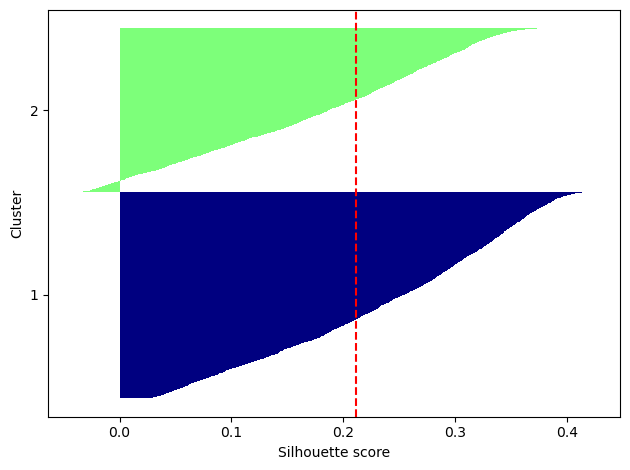

The average silhouette value for 3 clusters is 0.196


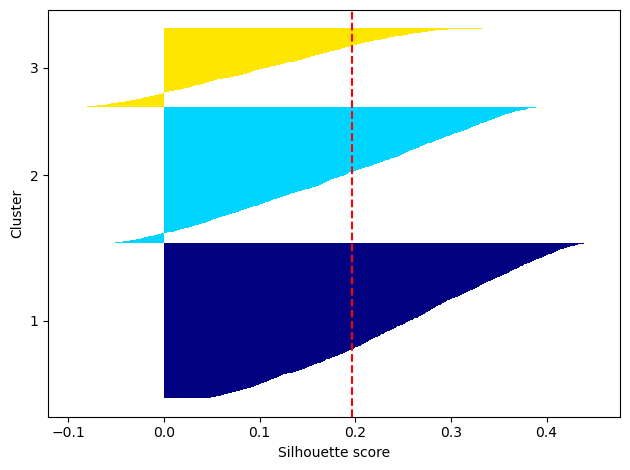

The average silhouette value for 4 clusters is 0.135


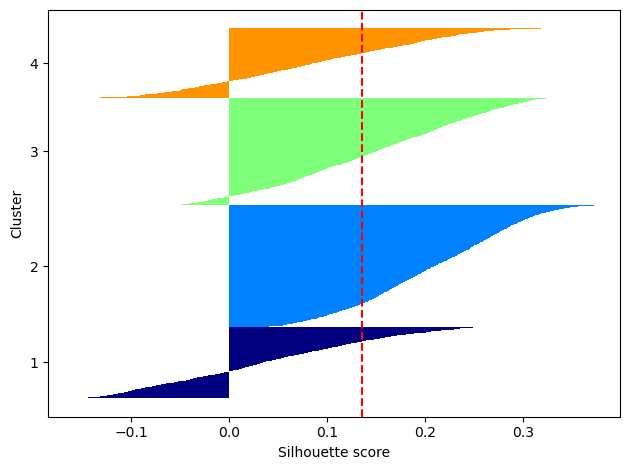

The average silhouette value for 5 clusters is 0.142


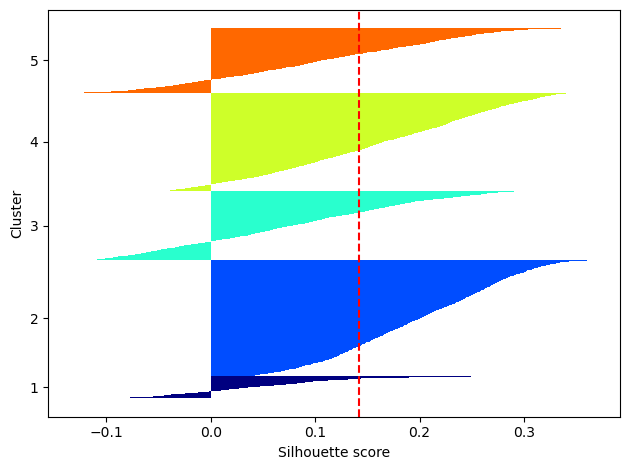

The average silhouette value for 6 clusters is 0.145


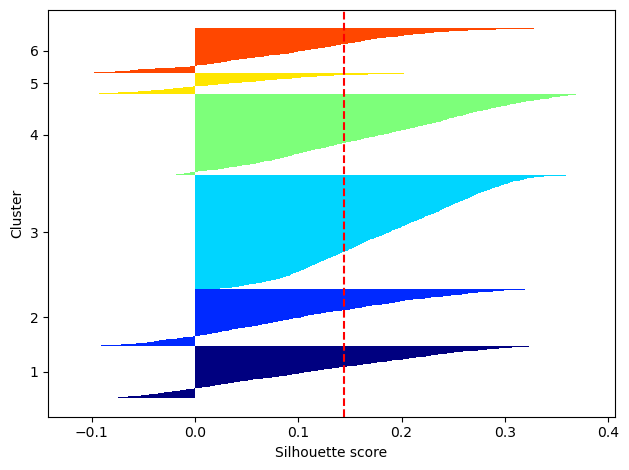

The average silhouette value for 7 clusters is 0.141


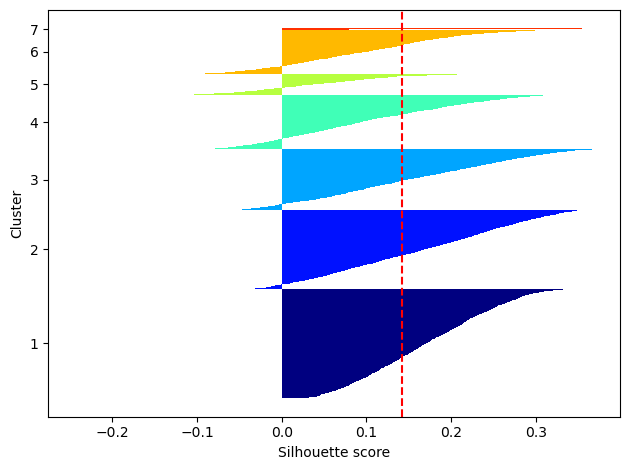

The average silhouette value for 8 clusters is 0.147


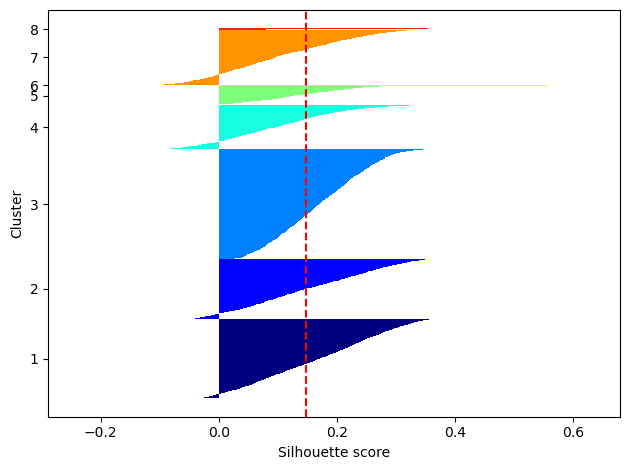

The average silhouette value for 9 clusters is 0.124


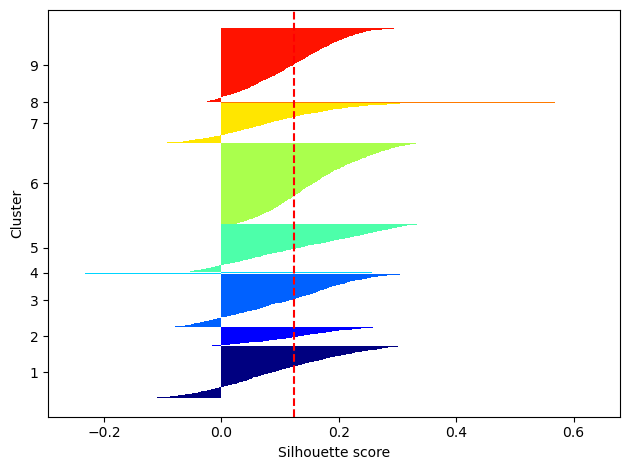

The average silhouette value for 10 clusters is 0.119


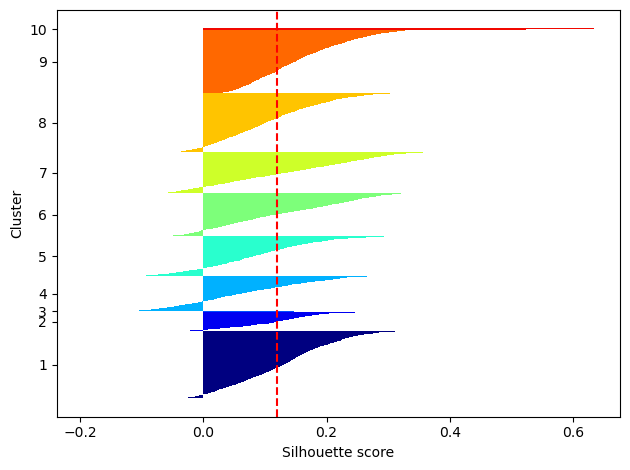

In [4]:
k_choice = list(range(2,11))
km_collection = {} #save y_km

for k in k_choice:
    km = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    y_km = km.fit_predict(std_desc)
    km_collection[f'{k}_clusters'] = y_km
    cluster_labels = np.unique(y_km)
    clust_nums = cluster_labels.shape[0]
    sil_vals = silhouette_samples(std_desc, y_km, metric = 'euclidean')
    y_bottom, y_upper = 0,0
    yticks = []
    
    for i,j in enumerate(cluster_labels):
        j_sil_vals = sil_vals[y_km == j]
        j_sil_vals.sort()
        y_upper += len(j_sil_vals)
        color = cm.jet(float(i)/clust_nums)
        plt.barh(range(y_bottom, y_upper), j_sil_vals, height = 1, edgecolor = 'none', color = color)
        yticks.append((y_bottom + y_upper)/2)
        y_bottom += len(j_sil_vals)
    
    sil_avg = np.mean(sil_vals)
    plt.axvline(sil_avg, color = 'red', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    print(f'The average silhouette value for {k} clusters is {round(sil_avg,3)}')
    plt.ylabel('Cluster')
    plt.xlabel("Silhouette score")
    plt.tight_layout()
    plt.savefig(f'feats_nopIC50_{k}_clusters.png')
    plt.show()

# Clustering with pIC50

In [5]:
desc_p_data = df.iloc[:,2:].values
p_std = StandardScaler()
std_p_desc = p_std.fit_transform(desc_p_data)

The average silhouette value for 2 clusters is 0.204


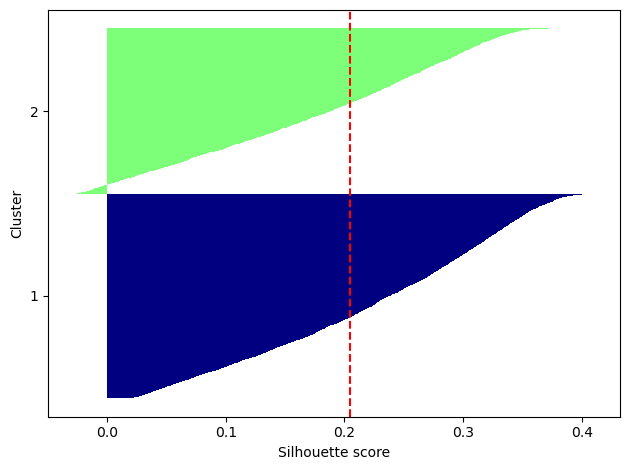

The average silhouette value for 3 clusters is 0.189


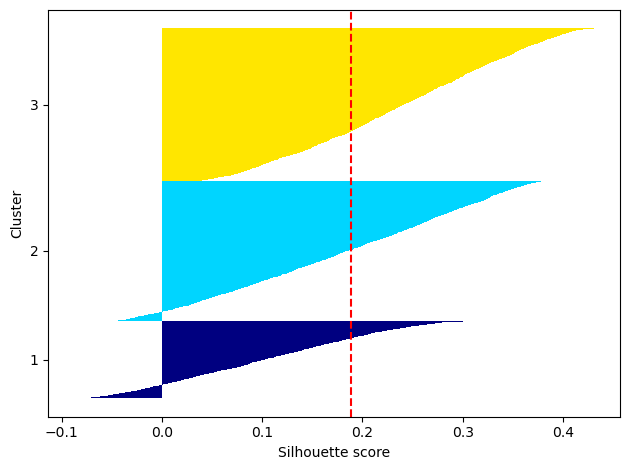

The average silhouette value for 4 clusters is 0.128


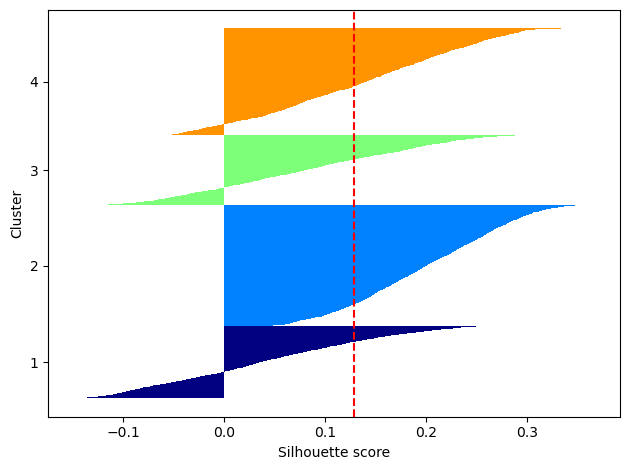

The average silhouette value for 5 clusters is 0.134


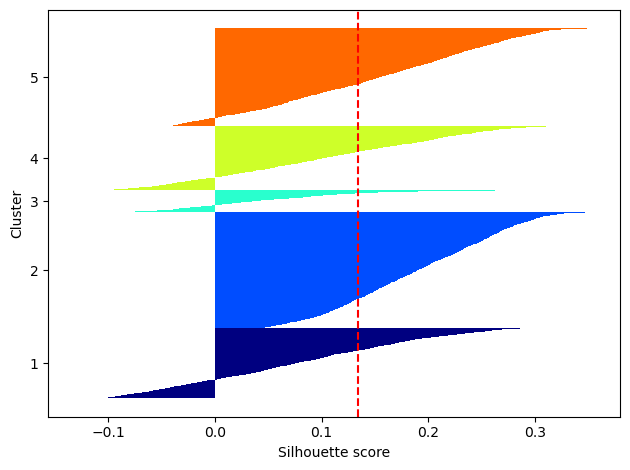

The average silhouette value for 6 clusters is 0.137


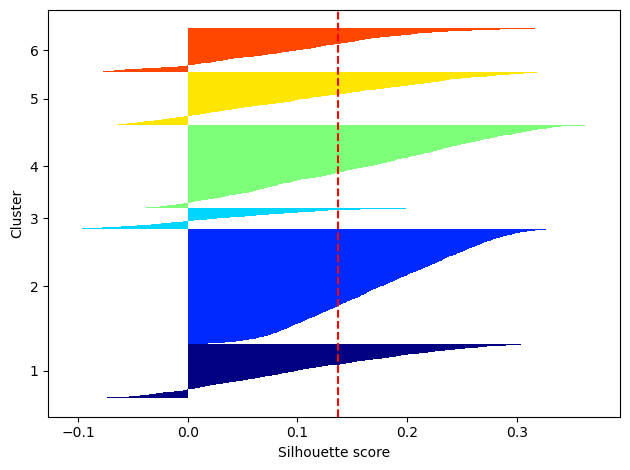

The average silhouette value for 7 clusters is 0.142


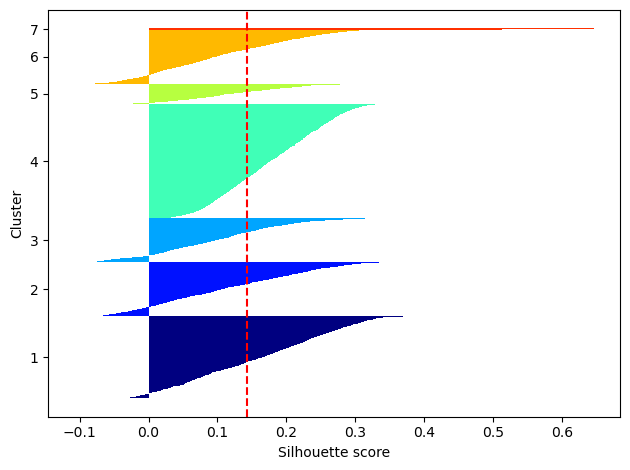

The average silhouette value for 8 clusters is 0.119


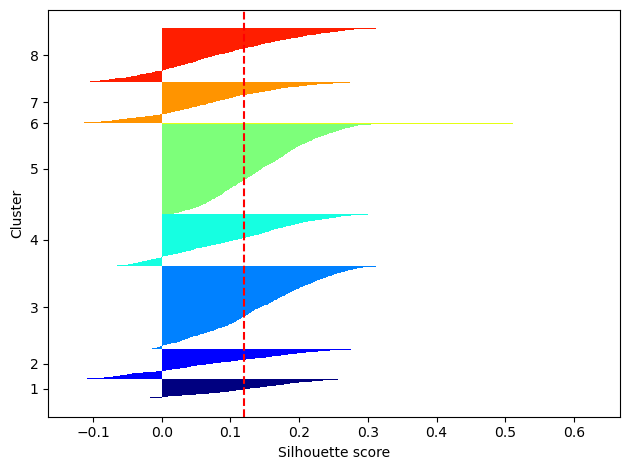

The average silhouette value for 9 clusters is 0.118


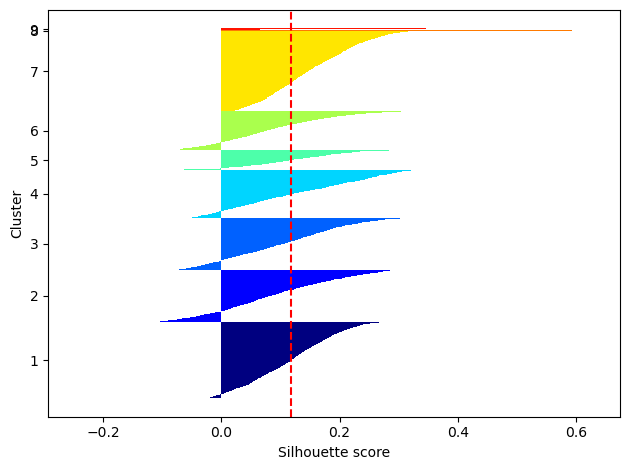

The average silhouette value for 10 clusters is 0.113


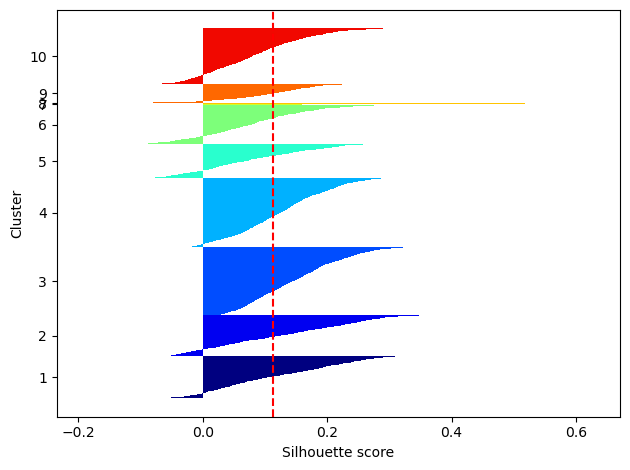

In [6]:
k_choice = list(range(2,11))
km_collection = {} #save y_km

for k in k_choice:
    km = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    y_km = km.fit_predict(std_p_desc)
    km_collection[f'{k}_clusters'] = y_km
    cluster_labels = np.unique(y_km)
    clust_nums = cluster_labels.shape[0]
    sil_vals = silhouette_samples(std_p_desc, y_km, metric = 'euclidean')
    y_bottom, y_upper = 0,0
    yticks = []
    
    for i,j in enumerate(cluster_labels):
        j_sil_vals = sil_vals[y_km == j]
        j_sil_vals.sort()
        y_upper += len(j_sil_vals)
        color = cm.jet(float(i)/clust_nums)
        plt.barh(range(y_bottom, y_upper), j_sil_vals, height = 1, edgecolor = 'none', color = color)
        yticks.append((y_bottom + y_upper)/2)
        y_bottom += len(j_sil_vals)
    
    sil_avg = np.mean(sil_vals)
    plt.axvline(sil_avg, color = 'red', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    print(f'The average silhouette value for {k} clusters is {round(sil_avg,3)}')
    plt.ylabel('Cluster')
    plt.xlabel("Silhouette score")
    plt.tight_layout()
    plt.savefig(f'feats_pIC50_{k}_clusters.png')
    plt.show()